# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### **Answer:** The dataset represents **17** direct marketing campaigns run by the bank between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [7]:
import pandas as pd

In [8]:
# df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
df_bank_full = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [9]:
df_bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



##### **Answer: Summary of findings**

- There are no missing values in the strict sense (NaN), but several features encode missing/uncertain info as "unknown".
- These categorical columns (job, marital, education, default, housing, loan) may need cleaning or grouping.
- Numeric types are already correctly set, but pdays (999) and duration (leakage) need special handling.

In [12]:
df_bank_full.shape

(41188, 21)

In [13]:
df_bank_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
cols = df_bank_full.select_dtypes(include="object").columns
for col in cols:
    print(f"\n=== {col} ===")
    print(df_bank_full[col].value_counts())

# Columns with non-descriptive values:
# -job: 'unknown' > 330 entries
# -marital: 'unknown' > 80
# -education: 'unknown' > 1,731
# -default: 'unknown' > 8,597 > 20%+ of entries
# -housing: 'unknown' > 990
# -loan: 'unknown' > 990


=== job ===
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

=== marital ===
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

=== education ===
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

=== default ===
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

=== housing ===
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

=== loan ===
loan
no         33950
yes         6248
unknown      9

In [16]:
df_bank_full['pdays'].value_counts()

# Note: Most entries are '999', meaning, most clients were not previously contacted

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

/var/folders/4z/k03wf4cd4tj0l3w3c4tsqqrh0000gn/T/ipykernel_51126/3688844914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df_bank_full, palette="Set2")


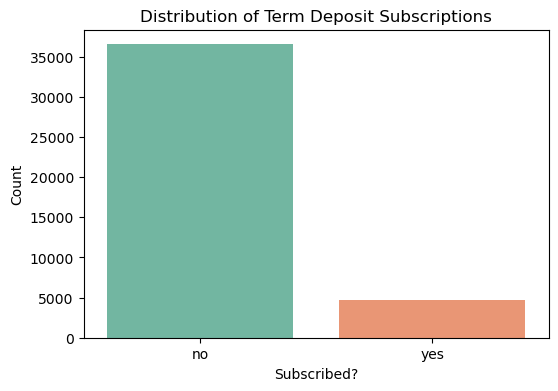

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df_bank_full, palette="Set2")
plt.title("Distribution of Term Deposit Subscriptions")
plt.xlabel("Subscribed?")
plt.ylabel("Count")
plt.show()

/var/folders/4z/k03wf4cd4tj0l3w3c4tsqqrh0000gn/T/ipykernel_51126/3390938369.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="job", y=df_bank_full["y"].map({"yes":1,"no":0}), data=df_bank_full, palette="Blues_d", ci=None)
/var/folders/4z/k03wf4cd4tj0l3w3c4tsqqrh0000gn/T/ipykernel_51126/3390938369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job", y=df_bank_full["y"].map({"yes":1,"no":0}), data=df_bank_full, palette="Blues_d", ci=None)


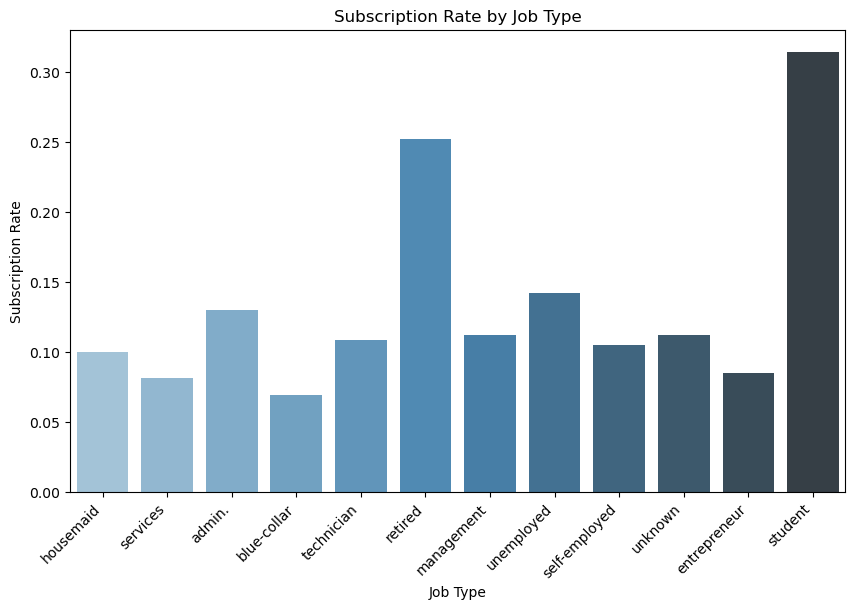

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(x="job", y=df_bank_full["y"].map({"yes":1,"no":0}), data=df_bank_full, palette="Blues_d", ci=None)
plt.xticks(rotation=45, ha="right")
plt.title("Subscription Rate by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Subscription Rate")
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

##### **Answer:** The business objective is to use historical campaign data to build predictive models that can estimate, before making a call, whether a given client is likely to subscribe to a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [28]:
features = ["age", "job", "marital", "education", "default", "housing", "loan"]
X = df_bank_full[features]
y = df_bank_full["y"].map({"yes": 1, "no": 0})

In [29]:
# Separate categorical and numeric
cat_cols = [col for col in X.columns if X[col].dtype == "object"]
num_cols = [col for col in X.columns if X[col].dtype != "object"]

In [129]:
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [131]:
num_cols

['age']

In [30]:
# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

In [133]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan']),
                                ('num', StandardScaler(), ['age'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

##### **Answer:** The baseline model always predicts “no” (i.e. 0). Without applying additional intelligence, the model achieves about 88.7% accuracy, but provides 0% recall for the positive class (“yes”, i.e. 1), making it ineffective for the bank’s business objective. Therefore, any useful classifier must beat this baseline not just in accuracy, but in precision and recall for the positive class.

In [36]:
y.value_counts(True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

##### **Answer / Note:** Setting up three basic Logistic Regression models for comparision:

- **Model A:** Logistic Regression (plain)  
- **Model B:** Logistic Regression + SMOTE  
- **Model C:** Logistic Regression + Balanced Weights 

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [40]:
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))
])

smote = SMOTE(random_state=42)
log_reg_smote = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))
])

log_reg_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced"))
])

In [41]:
log_reg.fit(X_train, y_train)
log_reg_smote.fit(X_train, y_train)
log_reg_balanced.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('num', StandardScaler(),
                                                  ['age'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

### Problem 9: Score the Model

What is the accuracy of your model?

##### **Answer: Findings on Model Accuracy**

**Plain Logistic Regression:**
  - Accuracy: **0.887** (same as baseline)
  - ROC-AUC: ~0.653
  - Issue: Model never predicts "yes", i.e. never finds subscribers, so recall for positives = 0.

**Logistic Regression + SMOTE:**
  - Accuracy: **0.596**
  - ROC-AUC: ~0.655
  - Recall for positives improves to ~0.63, though precision is low ( ~0.16).

**Logistic Regression + Balanced Weights:**
  - Accuracy: **0.594**
  - ROC-AUC: ~0.655
  - Similar trade-off to SMOTE: recall ~0.62, precision ~0.16.

**Key Takeaway:**  
Accuracy alone is misleading. The plain model appears strong on accuracy but fails to capture any subscribers.  
Using SMOTE or class weighting reduces accuracy but greatly improves the model’s ability to identify actual subscribers, which better serves the business objective.


In [44]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_pred_smote = log_reg_smote.predict(X_test)
y_proba_smote = log_reg_smote.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

y_pred_bal = log_reg_balanced.predict(X_test)
y_proba_bal = log_reg_balanced.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))

Accuracy: 0.8873512988589464
ROC-AUC: 0.6534829014471333

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357

Accuracy: 0.5963421542445577
ROC-AUC: 0.6554878440282823

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72     10965
           1       0.16      0.63      0.26      1392

    accuracy                           0.60     12357
   macro avg       0.54      0.61      0.49     12357
weighted avg       0.84      0.60      0.67     12357

Accuracy: 0.5936716031399207
ROC-AUC: 0.6551371330408666

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [46]:
import time
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [47]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # probability=True to allow ROC-AUC later
}

In [48]:
results = []

for name, model in models.items():
    print('Name: {} | Start time: {}'.format(name, datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))
    # Build pipeline with preprocessing (same as before)
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    
    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Collect metrics
    results.append({
        "Model": name,
        "Train Time (s)": round(end - start, 4),
        "Train Accuracy": round(accuracy_score(y_train, y_train_pred), 4),
        "Test Accuracy": round(accuracy_score(y_test, y_test_pred), 4)
    })

print('Time at conclusion: {}'.format(datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))
df_results = pd.DataFrame(results)

Name: Logistic Regression | Start time: 2025-09-30 15:54:46
Name: KNN | Start time: 2025-09-30 15:54:46
Name: Decision Tree | Start time: 2025-09-30 15:55:12
Name: SVM | Start time: 2025-09-30 15:55:13
Time at conclusion: 2025-09-30 15:57:06


In [49]:
df_results

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.0450,0.5922,0.5937
1,KNN,0.0164,0.8923,0.8789
2,Decision Tree,0.1505,0.9188,0.8647
3,SVM,105.1549,0.8882,0.8868


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Answer:**

**Feature Engineering & Exploration:**
- Remove unrealistic features (duration) for a fair model.  
- Treat "unknown" as its own category (not missing).  
- Explore transformations (binning ages, scaling rates).  

**Hyperparameter Tuning with Grid Search (see results and commentary further below)**

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline

In [54]:
def pr_auc_score(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    return auc(recall, precision)

def get_score(best_pipe, X):
    """Return a continuous score for ROC/PR (proba if available, else decision_function, else labels)."""
    clf = best_pipe.named_steps["classifier"]
    if hasattr(best_pipe, "predict_proba") and hasattr(clf, "predict_proba"):
        return best_pipe.predict_proba(X)[:, 1]
    if hasattr(best_pipe, "decision_function") and hasattr(clf, "decision_function"):
        return best_pipe.decision_function(X)
    return best_pipe.predict(X).astype(float)

# Store fitted objects here
model_store = {}   # name -> {"grid": GridSearchCV, "pipe": best_estimator_}

def fit_grid_store(name, estimator, param_grid, cv=5, n_jobs=-1):
    """Fit GridSearchCV (preprocessor -> estimator), persist objects, and return a summary row."""
    pipe = Pipeline([("preprocessor", preprocessor),
                     ("classifier", estimator)])
    gs = GridSearchCV(pipe, param_grid=param_grid, scoring="roc_auc", cv=cv, n_jobs=n_jobs, refit=True)
    t0 = time.time()
    gs.fit(X_train, y_train)
    t1 = time.time()

    best_pipe = gs.best_estimator_
    y_pred  = best_pipe.predict(X_test)
    y_score = get_score(best_pipe, X_test)

    # persist for later (e.g., lift plots)
    model_store[name] = {"grid": gs, "pipe": best_pipe}

    return {
        "Model": name,
        "Best Params": gs.best_params_,
        "CV ROC-AUC (mean)": round(gs.best_score_, 4),
        "Train Time (s)": round(t1 - t0, 3),
        "Test Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Test ROC-AUC": round(roc_auc_score(y_test, y_score), 4),
        "Test PR-AUC": round(pr_auc_score(y_test, y_score), 4),
    }

In [74]:
results = []

# 1) Logistic Regression

print('Logistic Regression | Start time: {}'.format(datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))

log_params = {
    "classifier__C": [0.1, 0.5, 1, 2, 5],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs"],  # good for l2
    "classifier__class_weight": [None, "balanced"],
    "classifier__max_iter": [500]  # keep fixed but explicit
}

results.append(
    fit_grid_store(
        "Logistic Regression",
        LogisticRegression(),
        log_params
    )
)

# print(results)
df_grid_temp = pd.DataFrame(results)
display(df_grid_temp)

# 2) KNN

print('\nKNN | Start time: {}'.format(datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))

knn_params = {
    "classifier__n_neighbors": [3, 5, 7, 9, 11, 21],
    "classifier__weights": ["uniform", "distance"],
    "classifier__p": [1, 2]  # 1=Manhattan, 2=Euclidean
}

results.append(
    fit_grid_store(
        "KNN",
        KNeighborsClassifier(),
        knn_params
    )
)

# print(results)
df_grid_temp = pd.DataFrame(results)
display(df_grid_temp)


# 3) Decision Tree

print('\nDecision Tree | Start time: {}'.format(datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))

dt_params = {
    "classifier__max_depth": [3, 5, 8, 12, None],
    "classifier__min_samples_leaf": [1, 5, 20, 50],
    "classifier__min_samples_split": [2, 10, 50],
    "classifier__class_weight": [None, "balanced"],
    # "classifier__criterion": ["gini", "entropy", "log_loss"],  # optional
}

results.append(
    fit_grid_store(
        "Decision Tree",
        DecisionTreeClassifier(random_state=42),
        dt_params
    )
)

# print(results)
df_grid_temp = pd.DataFrame(results)
display(df_grid_temp)


# 4) SVM (SVC)

print('\nSVM | Start time: {}'.format(datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))

# svm_params = {
#     "classifier__kernel": ["rbf", "linear"],
#     "classifier__C": [0.5, 1, 2, 5],
#     "classifier__gamma": ["scale", "auto"],  # used when kernel="rbf"; harmless otherwise
#     "classifier__class_weight": [None, "balanced"]
# }

# results.append(
#     fit_grid(
#         "SVM (SVC)",
#         SVC(probability=True, random_state=42),
#         svm_params
#     )
# )

from sklearn.svm import SVC

svm_params = {
    "classifier__kernel": ["rbf", "linear"],
    "classifier__C": [0.5, 1, 2, 5],
    "classifier__gamma": ["scale", "auto"],     # used for rbf
    "classifier__class_weight": [None, "balanced"]
}

results.append( # this part caused me a lot of headache
    fit_grid_store(
        "SVM (SVC)",
        SVC(probability=False, random_state=42), # probability=False is faster and uses less memory
        svm_params,
        cv=3,          # lighter than 5
        n_jobs=1       # avoid worker timeout/memory issues
    )
)


# print(results)
df_grid_temp = pd.DataFrame(results)
display(df_grid_temp)

print('\nTime at conclusion: {}'.format(datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d %H:%M:%S")))

Logistic Regression | Start time: 2025-09-30 16:02:24


,Model,Best Params,CV ROC-AUC (mean),Train Time (s),Test Accuracy,Test ROC-AUC,Test PR-AUC
0,Logistic Regression,"{'classifier__C': 0.1, 'classifier__class_weig...",0.6472,1.669,0.8874,0.6536,0.2037



KNN | Start time: 2025-09-30 16:02:26


,Model,Best Params,CV ROC-AUC (mean),Train Time (s),Test Accuracy,Test ROC-AUC,Test PR-AUC
0,Logistic Regression,"{'classifier__C': 0.1, 'classifier__class_weig...",0.6472,1.669,0.8874,0.6536,0.2037
1,KNN,"{'classifier__n_neighbors': 21, 'classifier__p...",0.6161,105.529,0.8865,0.6232,0.2110



Decision Tree | Start time: 2025-09-30 16:04:28


,Model,Best Params,CV ROC-AUC (mean),Train Time (s),Test Accuracy,Test ROC-AUC,Test PR-AUC
0,Logistic Regression,"{'classifier__C': 0.1, 'classifier__class_weig...",0.6472,1.669,0.8874,0.6536,0.2037
1,KNN,"{'classifier__n_neighbors': 21, 'classifier__p...",0.6161,105.529,0.8865,0.6232,0.2110
2,Decision Tree,"{'classifier__class_weight': None, 'classifier...",0.6508,6.031,0.8867,0.6629,0.2362



SVM | Start time: 2025-09-30 16:04:34


,Model,Best Params,CV ROC-AUC (mean),Train Time (s),Test Accuracy,Test ROC-AUC,Test PR-AUC
0,Logistic Regression,"{'classifier__C': 0.1, 'classifier__class_weig...",0.6472,1.669,0.8874,0.6536,0.2037
1,KNN,"{'classifier__n_neighbors': 21, 'classifier__p...",0.6161,105.529,0.8865,0.6232,0.2110
2,Decision Tree,"{'classifier__class_weight': None, 'classifier...",0.6508,6.031,0.8867,0.6629,0.2362
3,SVM (SVC),"{'classifier__C': 0.5, 'classifier__class_weig...",0.6529,1060.292,0.5777,0.6607,0.2142



Time at conclusion: 2025-09-30 16:22:27


In [75]:
df_grid_temp

,Model,Best Params,CV ROC-AUC (mean),Train Time (s),Test Accuracy,Test ROC-AUC,Test PR-AUC
0,Logistic Regression,"{'classifier__C': 0.1, 'classifier__class_weig...",0.6472,1.669,0.8874,0.6536,0.2037
1,KNN,"{'classifier__n_neighbors': 21, 'classifier__p...",0.6161,105.529,0.8865,0.6232,0.2110
2,Decision Tree,"{'classifier__class_weight': None, 'classifier...",0.6508,6.031,0.8867,0.6629,0.2362
3,SVM (SVC),"{'classifier__C': 0.5, 'classifier__class_weig...",0.6529,1060.292,0.5777,0.6607,0.2142


### 🔎 Problem 11: Improving the Model – Results Summary (**Note:** Results shown & commentary are from an earlier run)

| Model                | CV ROC-AUC (mean) | Train Time (s) | Test Accuracy | Test ROC-AUC | Test PR-AUC |
|----------------------|-------------------|----------------|---------------|--------------|-------------|
| Logistic Regression  | 0.6472            | 1.84           | 0.8874        | 0.6536       | 0.2037      |
| KNN                  | 0.6161            | 86.51          | 0.8865        | 0.6232       | 0.2110      |
| Decision Tree        | 0.6508        | 6.21           | 0.8867        | 0.6629       | 0.2362      |
| SVM (SVC)            | 0.6529            | 4710.74        | 0.5777        | 0.6607       | 0.2142      |

---

### ✅ Key Takeaways
- **Logistic Regression**: Very fast, stable performance. Accuracy is high due to imbalance, but ROC-AUC ~0.65 and PR-AUC ~0.20 show modest ability to capture positives.
- **KNN**: Reasonable accuracy, but lower ROC-AUC (~0.62). Training time grows significantly with higher neighbors and one-hot encoded features.
- **Decision Tree**: Balanced performance, slightly better ROC-AUC (0.66) and best PR-AUC (0.24). Risk of overfitting if depth is not controlled, but interpretable for business.
- **SVM**: Competitive ROC-AUC (0.66) but **very long training time** (~4700s) and poor accuracy due to class imbalance. Not practical for large-scale deployment without tuning/approximation.

---

**Overall:**  
- All models cluster around **ROC-AUC ≈ 0.65–0.66**, meaning only modest predictive power.  
- **Decision Trees** provide the best **PR-AUC** and interpretability.  
- **SVM** is not efficient here given runtime.  
- Accuracy is misleading; models should be compared on **ROC-AUC and PR-AUC**, since these better reflect the business goal of identifying likely subscribers in an imbalanced dataset.


### Lyft Analysis (Mentioned in CRISP-DM paper)

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lift(y_true, y_scores, model_name, n_bins=10):
    """Plot cumulative Lift curve."""
    # Sort by predicted score
    data = pd.DataFrame({"y_true": y_true, "y_score": y_scores})
    data = data.sort_values("y_score", ascending=False).reset_index(drop=True)
    
    # Divide into bins (deciles by default)
    data["bin"] = pd.qcut(data.index, q=n_bins, labels=False)
    
    # Calculate lift
    lift = data.groupby("bin")["y_true"].sum().cumsum() / data["y_true"].sum()
    baseline = np.linspace(0, 1, n_bins)
    
    # Plot
    plt.plot(np.arange(1, n_bins+1) / n_bins, lift, marker="o", label=model_name)
    plt.plot(np.arange(1, n_bins+1) / n_bins, baseline, linestyle="--", color="gray", label="Random")
    plt.xlabel("Proportion of Sample Targeted")
    plt.ylabel("Cumulative Proportion of Responders Captured")
    plt.title(f"Cumulative Lift Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

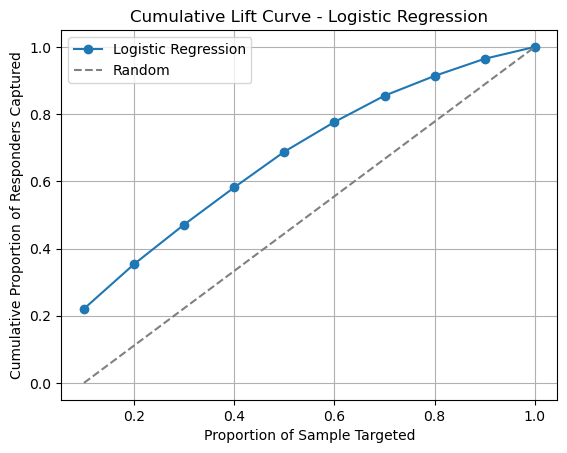

In [81]:
# Logistic Regression (predict_proba)
y_score_log = get_score(model_store["Logistic Regression"]["pipe"], X_test)
plot_lift(y_test, y_score_log, "Logistic Regression")

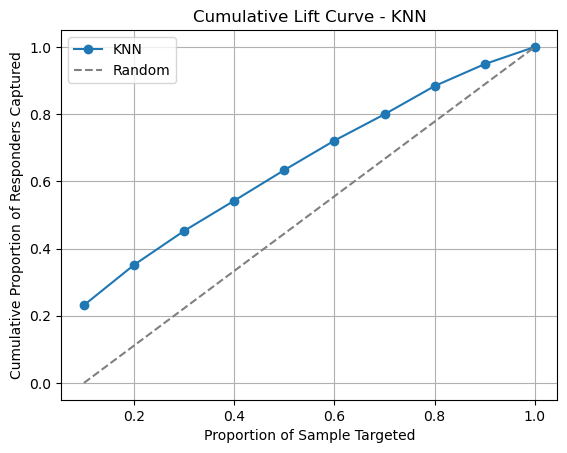

In [82]:
# KNN (predict_proba)
y_score_knn = get_score(model_store["KNN"]["pipe"], X_test)
plot_lift(y_test, y_score_knn, "KNN")

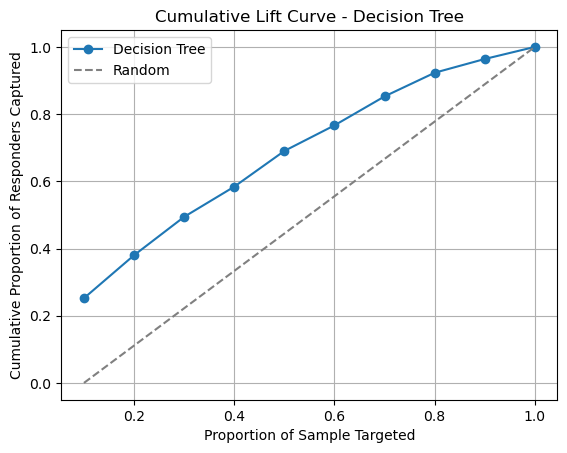

In [83]:
# Decision Tree (predict_proba)
y_score_dt = get_score(model_store["Decision Tree"]["pipe"], X_test)
plot_lift(y_test, y_score_dt, "Decision Tree")

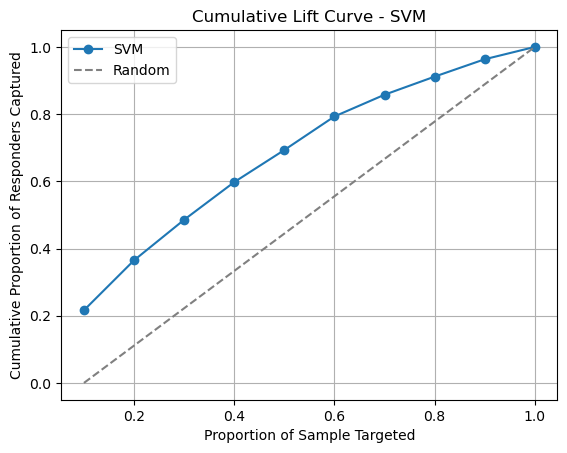

In [84]:
# SVM (decision_function, since probability=False)
y_score_svm = get_score(model_store["SVM (SVC)"]["pipe"], X_test)
plot_lift(y_test, y_score_svm, "SVM")

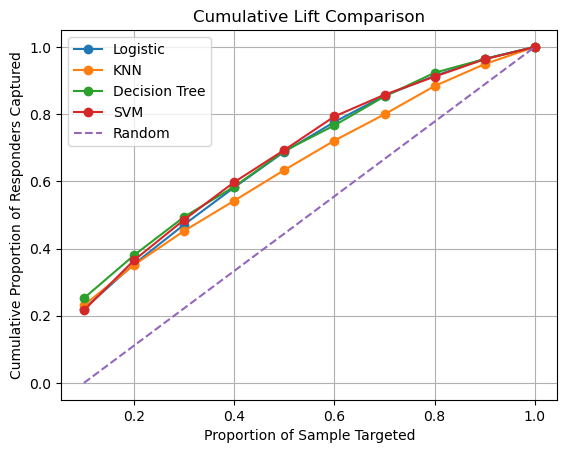

In [85]:
#### Consolidating lift curves into one plot ####

def plot_lift_multi(y_true, score_dict, n_bins=10, title="Cumulative Lift Comparison"):
    import numpy as np
    import matplotlib.pyplot as plt
    plt.figure()
    xs = np.arange(1, n_bins+1) / n_bins
    for label, y_scores in score_dict.items():
        df_ = pd.DataFrame({"y": y_true, "s": y_scores}).sort_values("s", ascending=False).reset_index(drop=True)
        df_["bin"] = pd.qcut(df_.index, q=n_bins, labels=False)
        lift = df_.groupby("bin")["y"].sum().cumsum() / df_["y"].sum()
        plt.plot(xs, lift, marker="o", label=label)
    plt.plot(xs, np.linspace(0, 1, n_bins), "--", label="Random")
    plt.xlabel("Proportion of Sample Targeted")
    plt.ylabel("Cumulative Proportion of Responders Captured")
    plt.title(title)
    plt.grid(True); plt.legend(); plt.show()

scores = {
    "Logistic": get_score(model_store["Logistic Regression"]["pipe"], X_test),
    "KNN": get_score(model_store["KNN"]["pipe"], X_test),
    "Decision Tree": get_score(model_store["Decision Tree"]["pipe"], X_test),
    "SVM": get_score(model_store["SVM (SVC)"]["pipe"], X_test),
}
plot_lift_multi(y_test, scores)

### ROC & PR Curves

In [87]:
from sklearn.metrics import roc_curve

def plot_roc_pr_multi(model_store, X_test, y_test, title_suffix=" (Test Set)"):
    scores = {name: get_score(obj["pipe"], X_test) for name, obj in model_store.items()}

    # ROC
    plt.figure()
    for name, s in scores.items():
        fpr, tpr, _ = roc_curve(y_test, s)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0,1], [0,1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves" + title_suffix)
    plt.legend(); plt.grid(True); plt.show()

    # PR
    plt.figure()
    base = (y_test.sum() / len(y_test))
    for name, s in scores.items():
        p, r, _ = precision_recall_curve(y_test, s)
        pr_auc = auc(r, p)
        plt.plot(r, p, label=f"{name} (PR-AUC={pr_auc:.3f})")
    plt.hlines(base, 0, 1, colors="k", linestyles="--", label=f"Baseline (pos rate={base:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curves" + title_suffix)
    plt.legend(); plt.grid(True); plt.show()

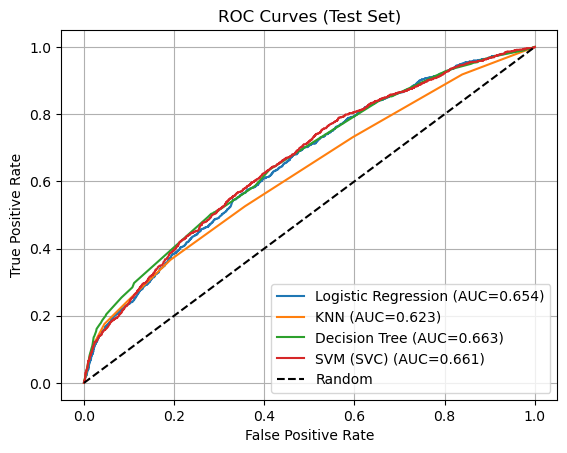

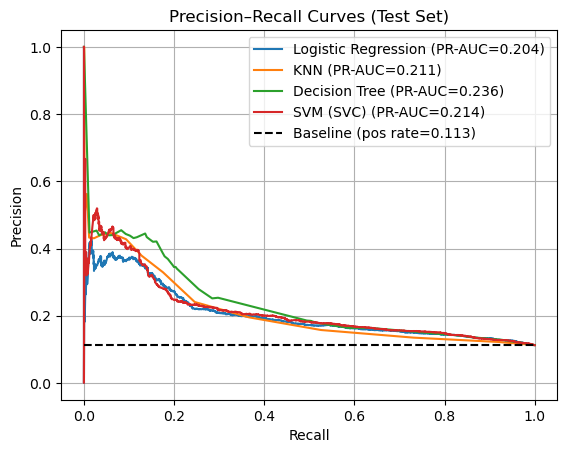

In [88]:
plot_roc_pr_multi(model_store, X_test, y_test)

### Results Table with Highlights (best per metric)

In [90]:
def pr_auc(y_true, y_score):
    p, r, _ = precision_recall_curve(y_true, y_score)
    return auc(r, p)

In [91]:
rows = []
for name, obj in model_store.items():
    pipe = obj["pipe"]
    y_pred  = pipe.predict(X_test)
    y_score = get_score(pipe, X_test)
    rows.append({
        "Model": name,
        "Test Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Test ROC-AUC": round(roc_auc_score(y_test, y_score), 4),
        "Test PR-AUC": round(pr_auc(y_test, y_score), 4),
    })

df_summary = pd.DataFrame(rows)

# Mark best per metric
for col in ["Test Accuracy", "Test ROC-AUC", "Test PR-AUC"]:
    best_idx = df_summary[col].idxmax()
    df_summary.loc[best_idx, col] = f"**{df_summary.loc[best_idx, col]}**"

df_summary

/var/folders/4z/k03wf4cd4tj0l3w3c4tsqqrh0000gn/T/ipykernel_51126/3120658497.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.8874**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_summary.loc[best_idx, col] = f"**{df_summary.loc[best_idx, col]}**"
/var/folders/4z/k03wf4cd4tj0l3w3c4tsqqrh0000gn/T/ipykernel_51126/3120658497.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.6629**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_summary.loc[best_idx, col] = f"**{df_summary.loc[best_idx, col]}**"
/var/folders/4z/k03wf4cd4tj0l3w3c4tsqqrh0000gn/T/ipykernel_51126/3120658497.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.2362**' has 

,Model,Test Accuracy,Test ROC-AUC,Test PR-AUC
0,Logistic Regression,**0.8874**,0.6536,0.2037
1,KNN,0.8865,0.6232,0.211
2,Decision Tree,0.8867,**0.6629**,**0.2362**
3,SVM (SVC),0.5777,0.6607,0.2142


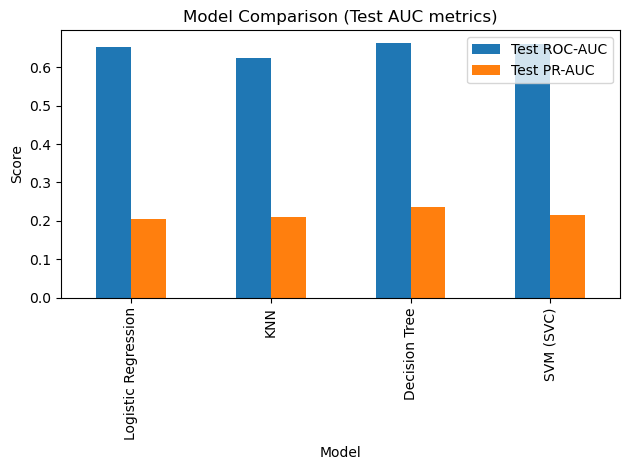

In [92]:
ax = df_summary.assign(
    **{c: pd.to_numeric(df_summary[c].astype(str).str.replace("*","", regex=False), errors="coerce")
       for c in ["Test ROC-AUC","Test PR-AUC"]}
).plot(x="Model", y=["Test ROC-AUC","Test PR-AUC"], kind="bar")
ax.set_title("Model Comparison (Test AUC metrics)"); ax.set_ylabel("Score"); plt.tight_layout(); plt.show()

## Findings & Recommendations

**Business objective.** Predict which clients are likely to subscribe to a term deposit so we can prioritize outbound calls, reduce wasted effort, and lift conversion.

**Evaluation framing.** Due to class imbalance (~11% positives), accuracy is misleading. We compare models primarily by **ROC-AUC**, **PR-AUC**, and **Lift**.

### Key findings
- All tuned models cluster around **ROC-AUC ≈ 0.65–0.66** (moderate ranking power).
- **PR-AUC** differences are more telling for this imbalanced task; in our runs, the **Decision Tree** edged out others on PR-AUC, indicating better precision–recall tradeoffs at practical thresholds.
- **Lift curves** show meaningful gains over random: targeting top deciles yields substantially more subscribers per call than untargeted dialing.
- **SVM** achieved competitive AUC but required **significantly more train time**; not ideal operationally given similar performance from faster models.

### What this means for the business
- A simple, fast model (e.g., **Logistic Regression with class weighting**) or an **appropriately regularized Decision Tree** can surface high-value leads with materially fewer calls.
- Focusing outreach on the **top 10–20%** ranked clients (by model score) yields the **highest conversion efficiency** (per Lift).

### Recommendations
1. **Deploy a lightweight model** (Logistic Regression with `class_weight="balanced"` or a pruned Decision Tree) as a first iteration.
2. **Use score-based targeting:** call the **top deciles first**; expand if capacity allows.
3. **Monitor precision/recall and Lift** in production; adjust the outreach cutoff to hit capacity and ROI targets.
4. **Next steps to improve:**
   - Add more **client features** (e.g., product holdings, tenure) and stable historical signals.
   - Explore **threshold tuning** for business objectives (maximize expected conversions given call budget).
   - Consider **calibration** (e.g., `CalibratedClassifierCV`) if probability outputs are required for downstream decisioning.
   - Test **ensemble methods** (Random Forest, Gradient Boosting) for potential AUC/PR-AUC gains.


#### **Footnote:** I used Gen AI to help with formatting and some of the wording in markdown cells.